In [1]:
import os, glob
import nibabel as nib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.ndimage.morphology import binary_erosion

In [2]:
def get_mean(array):
    if array.size != 0: return array.mean()
    else: return math.nan

def get_std(array):
    if array.size != 0: return array.std()
    else: return math.nan

def get_median(array):
    if array.size != 0: return np.median(array)
    else: return math.nan

def erode_liver_3D(liver_array, voxel_dimensions):
    radius = 5
    x_dim = voxel_dimensions[0]
    y_dim = voxel_dimensions[1]
    z_dim = voxel_dimensions[2]
    kernel = np.zeros((2*int(math.ceil(radius/x_dim))+1, 2*int(math.ceil(radius/y_dim))+1, 2*int(math.ceil(radius/z_dim))+1))
    x,y,z = np.ogrid[-int(math.ceil(radius/x_dim)):int(math.ceil(radius/x_dim))+1, -int(math.ceil(radius/y_dim)):int(math.ceil(radius/y_dim))+1,-int(math.ceil(radius/z_dim)):int(math.ceil(radius/z_dim))+1]
    mask = ((x*x_dim)**2 + (y*y_dim)**2) + (z*z_dim)**2 <= radius**2
    kernel[mask] = 1
    eroded_liver = binary_erosion(liver_array, structure = kernel)

    return eroded_liver

In [3]:
original_mask_path =          r'N:\2_Analysis\automated_analysis\flint_segmentations\flint_additions\analysis masks\original_segseg/'
corrected_with_vessels_path = r'N:\2_Analysis\automated_analysis\flint_segmentations\flint_additions\analysis masks\human_corrected_without_vessel_removal/'
corrected_no_vessels_path =   r'N:\2_Analysis\automated_analysis\flint_segmentations\flint_additions\analysis masks\human_corrected_with_vessel_removal/'
new_vessel_mask_path =        r'N:\2_Analysis\automated_analysis\flint_segmentations\flint_additions\analysis masks\vessel_segmentation/'
fat_frac_path =               r'N:\2_Analysis\automated_analysis\flint_segmentations\flint_additions\analysis masks\fatfrac'

print(original_mask_path)
print(corrected_with_vessels_path)
print(corrected_no_vessels_path)
print(new_vessel_mask_path)
print(fat_frac_path)

N:\2_Analysis\automated_analysis\flint_segmentations\flint_additions\analysis masks\original_segseg/
N:\2_Analysis\automated_analysis\flint_segmentations\flint_additions\analysis masks\human_corrected_without_vessel_removal/
N:\2_Analysis\automated_analysis\flint_segmentations\flint_additions\analysis masks\human_corrected_with_vessel_removal/
N:\2_Analysis\automated_analysis\flint_segmentations\flint_additions\analysis masks\vessel_segmentation/
N:\2_Analysis\automated_analysis\flint_segmentations\flint_additions\analysis masks\fatfrac


In [4]:
original_mask_paths = []
corrected_with_vessels_paths = []
corrected_no_vessels_paths = []
new_vessel_mask_paths = []
fat_frac_paths = []

for root, dirs, files in os.walk(original_mask_path):
    for file in files:
        if file.endswith(".nii"):
             original_mask_paths.append(os.path.join(root, file))
                
for root, dirs, files in os.walk(corrected_with_vessels_path):
    for file in files:
        if file.endswith(".nii"):
             corrected_with_vessels_paths.append(os.path.join(root, file))
    
for root, dirs, files in os.walk(corrected_no_vessels_path):
    for file in files:
        if file.endswith(".nii"):
             corrected_no_vessels_paths.append(os.path.join(root, file))
        
for root, dirs, files in os.walk(new_vessel_mask_path):
    for file in files:
        if file.endswith(".nii"):
             new_vessel_mask_paths.append(os.path.join(root, file))
                
for root, dirs, files in os.walk(fat_frac_path):
    for file in files:
        if file.endswith(".nii"):
             fat_frac_paths.append(os.path.join(root, file))

original_mask_paths = sorted(original_mask_paths)
corrected_with_vessels_paths = sorted(corrected_with_vessels_paths)
corrected_no_vessels_paths = sorted(corrected_no_vessels_paths)
new_vessel_mask_paths = sorted(new_vessel_mask_paths)
fat_frac_paths = sorted(fat_frac_paths)

print(len(original_mask_paths))
print(len(corrected_with_vessels_paths))
print(len(corrected_no_vessels_paths))
print(len(new_vessel_mask_paths))
print(len(fat_frac_paths))

print(original_mask_paths[5])
print(corrected_with_vessels_paths[5])
print(corrected_no_vessels_paths[5])
print(new_vessel_mask_paths[5])
print(fat_frac_paths[5])

6
6
6
6
6
N:\2_Analysis\automated_analysis\flint_segmentations\flint_additions\analysis masks\original_segseg/f_8391.nii
N:\2_Analysis\automated_analysis\flint_segmentations\flint_additions\analysis masks\human_corrected_without_vessel_removal/f_8391.nii
N:\2_Analysis\automated_analysis\flint_segmentations\flint_additions\analysis masks\human_corrected_with_vessel_removal/f_8391.nii
N:\2_Analysis\automated_analysis\flint_segmentations\flint_additions\analysis masks\vessel_segmentation/f_8391.nii
N:\2_Analysis\automated_analysis\flint_segmentations\flint_additions\analysis masks\fatfrac\f_8391.nii


In [28]:
data = {'Patient ID' : [],
        'vessel_ff_mean' : [],
        'vessel_ff_median' : [],
        'vessel_ff_std' : []}

data['OM_WHOLE_ff_mean'] = []
data['OM_WHOLE_ff_median'] = []
data['OM_WHOLE_ff_std'] = []
data['OM_LEFT_LOBE_ff_mean'] = []
data['OM_LEFT_LOBE_ff_median'] = []
data['OM_LEFT_LOBE_ff_std'] = []
data['OM_RIGHT_LOBE_ff_mean'] = []
data['OM_RIGHT_LOBE_ff_median'] = []
data['OM_RIGHT_LOBE_ff_std'] = []
data['OM_CAUDATE_ff_mean'] = []
data['OM_CAUDATE_ff_median'] = []
data['OM_CAUDATE_ff_std'] = []

for i in range(2):
    data['OM_segment_' + str(i+2) + '_ff_mean'] = []
    data['OM_segment_' + str(i+2) + '_ff_median'] = []
    data['OM_segment_' + str(i+2) + '_ff_std'] = []

data['OM_segment_4a_ff_mean'] = []
data['OM_segment_4a_ff_median'] = []
data['OM_segment_4a_ff_std'] = []
data['OM_segment_4b_ff_mean'] = []
data['OM_segment_4b_ff_median'] = []
data['OM_segment_4b_ff_std'] = []
    
for i in range(4):
    data['OM_segment_' + str(i+5) + '_ff_mean'] = []
    data['OM_segment_' + str(i+5) + '_ff_median'] = []
    data['OM_segment_' + str(i+5) + '_ff_std'] = []
    
data['HCBVR_WHOLE_ff_mean'] = []
data['HCBVR_WHOLE_ff_median'] = []
data['HCBVR_WHOLE_ff_std'] = []
data['HCBVR_LEFT_LOBE_ff_mean'] = []
data['HCBVR_LEFT_LOBE_ff_median'] = []
data['HCBVR_LEFT_LOBE_ff_std'] = []
data['HCBVR_RIGHT_LOBE_ff_mean'] = []
data['HCBVR_RIGHT_LOBE_ff_median'] = []
data['HCBVR_RIGHT_LOBE_ff_std'] = []
data['HCBVR_CAUDATE_ff_mean'] = []
data['HCBVR_CAUDATE_ff_median'] = []
data['HCBVR_CAUDATE_ff_std'] = []

for i in range(2):
    data['HCBVR_segment_' + str(i+2) + '_ff_mean'] = []
    data['HCBVR_segment_' + str(i+2) + '_ff_median'] = []
    data['HCBVR_segment_' + str(i+2) + '_ff_std'] = []

data['HCBVR_segment_4a_ff_mean'] = []
data['HCBVR_segment_4a_ff_median'] = []
data['HCBVR_segment_4a_ff_std'] = []
data['HCBVR_segment_4b_ff_mean'] = []
data['HCBVR_segment_4b_ff_median'] = []
data['HCBVR_segment_4b_ff_std'] = []
    
for i in range(4):
    data['HCBVR_segment_' + str(i+5) + '_ff_mean'] = []
    data['HCBVR_segment_' + str(i+5) + '_ff_median'] = []
    data['HCBVR_segment_' + str(i+5) + '_ff_std'] = []
    
data['HCAVR_WHOLE_ff_mean'] = []
data['HCAVR_WHOLE_ff_median'] = []
data['HCAVR_WHOLE_ff_std'] = []
data['HCAVR_LEFT_LOBE_ff_mean'] = []
data['HCAVR_LEFT_LOBE_ff_median'] = []
data['HCAVR_LEFT_LOBE_ff_std'] = []
data['HCAVR_RIGHT_LOBE_ff_mean'] = []
data['HCAVR_RIGHT_LOBE_ff_median'] = []
data['HCAVR_RIGHT_LOBE_ff_std'] = []
data['HCAVR_CAUDATE_ff_mean'] = []
data['HCAVR_CAUDATE_ff_median'] = []
data['HCAVR_CAUDATE_ff_std'] = []

for i in range(2):
    data['HCAVR_segment_' + str(i+2) + '_ff_mean'] = []
    data['HCAVR_segment_' + str(i+2) + '_ff_median'] = []
    data['HCAVR_segment_' + str(i+2) + '_ff_std'] = []

data['HCAVR_segment_4a_ff_mean'] = []
data['HCAVR_segment_4a_ff_median'] = []
data['HCAVR_segment_4a_ff_std'] = []
data['HCAVR_segment_4b_ff_mean'] = []
data['HCAVR_segment_4b_ff_median'] = []
data['HCAVR_segment_4b_ff_std'] = []
    
for i in range(4):
    data['HCAVR_segment_' + str(i+5) + '_ff_mean'] = []
    data['HCAVR_segment_' + str(i+5) + '_ff_median'] = []
    data['HCAVR_segment_' + str(i+5) + '_ff_std'] = []

In [ ]:
''' AUTO GENERATE FOR AN ENTIRE DIRECTORY '''

In [36]:
orig_pre   = r'N:\2_Analysis\automated_analysis\cynch_segmentations\analysis_masks\original_segseg/'
hcbvr_pre  = r'N:\2_Analysis\automated_analysis\cynch_segmentations\analysis_masks\human_corrected_without_vessel_removal/'
hcavr_pre  = r'N:\2_Analysis\automated_analysis\cynch_segmentations\analysis_masks\human_corrected_with_vessel_removal/'
ff_pre     = r'N:\2_Analysis\automated_analysis\cynch_segmentations\analysis_masks\fatfrac/'
vessel_pre = r'N:\2_Analysis\automated_analysis\cynch_segmentations\analysis_masks\vessel_segmentation/'

In [ ]:
for i in original_mask_paths:
    case_id = i[84:]
    
    orig   = nib.load(orig_pre + case_id).get_fdata()
    hcbvr  = nib.load(hcbvr_pre + case_id[:6] + '_edited.nii').get_fdata()
    hcavr  = nib.load(hcavr_pre + case_id[:6] + '.nii').get_fdata()
    ff     = nib.load(ff_pre + case_id).get_fdata()
    vessel = nib.load(vessel_pre + case_id).get_fdata()
    
    orig = np.swapaxes(orig, 0, 1)
    orig = np.flip(orig, 0)
    orig = np.flip(orig, 1)
    hcbvr = np.swapaxes(hcbvr, 0, 1)
    hcbvr = np.flip(hcbvr, 0)
    hcbvr = np.flip(hcbvr, 1)
    hcavr = np.swapaxes(hcavr, 0, 1)
    hcavr = np.flip(hcavr, 0)
    hcavr = np.flip(hcavr, 1)
    ff = np.swapaxes(ff, 0, 1)
    ff = np.flip(ff, 0)
    ff = np.flip(ff, 1)
    vessel = np.swapaxes(vessel, 0, 1)
    vessel = np.flip(vessel, 0)
    vessel = np.flip(vessel, 1)
    
    
    ### ERODE EACH MASK
    
    image_orig = nib.load(orig_pre + case_id)
    voxel_dimensions_orig = (image_orig.affine[0,0],image_orig.affine[1,1],image_orig.affine[2,2])
    eroded_orig = erode_liver_3D(orig, voxel_dimensions_orig)
    orig = np.multiply(eroded_orig, orig)
    
    image_hcbvr = nib.load(hcbvr_pre + case_id[:6] + '_edited.nii')
    voxel_dimensions_hcbvr = (image_hcbvr.affine[0,0],image_hcbvr.affine[1,1],image_hcbvr.affine[2,2])
    eroded_hcbvr = erode_liver_3D(hcbvr, voxel_dimensions_hcbvr)
    hcbvr = np.multiply(eroded_hcbvr, hcbvr)
    
    image_hcavr = nib.load(hcavr_pre + case_id[:6] + '.nii')
    voxel_dimensions_hcavr = (image_hcavr.affine[0,0],image_hcavr.affine[1,1],image_hcavr.affine[2,2])
    eroded_hcavr = erode_liver_3D(hcavr, voxel_dimensions_hcavr)
    hcavr = np.multiply(eroded_hcavr, hcavr)
    

    
    om_ll = np.zeros((orig.shape[0],orig.shape[1],orig.shape[2]))

    om_ll[orig != 0] = 1
    om_ll[orig == 5] = 0
    om_ll[orig == 6] = 0
    om_ll[orig == 7] = 0
    om_ll[orig == 8] = 0
    om_ll[orig == 1] = 0
    
    om_rl = np.zeros((orig.shape[0],orig.shape[1],orig.shape[2]))

    om_rl[orig != 0] = 1
    om_rl[orig == 2] = 0
    om_rl[orig == 3] = 0
    om_rl[orig == 4] = 0
    om_rl[orig == 9] = 0
    om_rl[orig == 1] = 0
    
    hcbvr_ll = np.zeros((hcbvr.shape[0],hcbvr.shape[1],hcbvr.shape[2]))

    hcbvr_ll[hcbvr != 0] = 1
    hcbvr_ll[hcbvr == 5] = 0
    hcbvr_ll[hcbvr == 6] = 0
    hcbvr_ll[hcbvr == 7] = 0
    hcbvr_ll[hcbvr == 8] = 0
    hcbvr_ll[hcbvr == 1] = 0
    
    hcbvr_rl = np.zeros((hcbvr.shape[0],hcbvr.shape[1],hcbvr.shape[2]))

    hcbvr_rl[hcbvr != 0] = 1
    hcbvr_rl[hcbvr == 2] = 0
    hcbvr_rl[hcbvr == 3] = 0
    hcbvr_rl[hcbvr == 4] = 0
    hcbvr_rl[hcbvr == 9] = 0
    hcbvr_rl[hcbvr == 1] = 0

    hcavr_ll = np.zeros((hcavr.shape[0],hcavr.shape[1],hcavr.shape[2]))

    hcavr_ll[hcavr != 0] = 1
    hcavr_ll[hcavr == 5] = 0
    hcavr_ll[hcavr == 6] = 0
    hcavr_ll[hcavr == 7] = 0
    hcavr_ll[hcavr == 8] = 0
    hcavr_ll[hcavr == 1] = 0

    hcavr_rl = np.zeros((hcavr.shape[0],hcavr.shape[1],hcavr.shape[2]))

    hcavr_rl[hcavr != 0] = 1
    hcavr_rl[hcavr == 2] = 0
    hcavr_rl[hcavr == 3] = 0
    hcavr_rl[hcavr == 4] = 0
    hcavr_rl[hcavr == 9] = 0
    hcavr_rl[hcavr == 1] = 0
    
    
    data['Patient ID'].append(case_id)
    data['vessel_ff_mean'].append(get_mean(ff[vessel == 1]))
    data['vessel_ff_median'].append(get_median(ff[vessel == 1]))
    data['vessel_ff_std'].append(get_std(ff[vessel == 1]))

    data['OM_WHOLE_ff_mean'].append(get_mean(ff[orig != 0]))
    data['OM_WHOLE_ff_median'].append(get_median(ff[orig != 0]))
    data['OM_WHOLE_ff_std'].append(get_std(ff[orig != 0]))
    data['OM_LEFT_LOBE_ff_mean'].append(get_mean(ff[om_ll == 1]))
    data['OM_LEFT_LOBE_ff_median'].append(get_median(ff[om_ll == 1]))
    data['OM_LEFT_LOBE_ff_std'].append(get_std(ff[om_ll == 1]))
    data['OM_RIGHT_LOBE_ff_mean'].append(get_mean(ff[om_rl == 1]))
    data['OM_RIGHT_LOBE_ff_median'].append(get_median(ff[om_rl == 1]))
    data['OM_RIGHT_LOBE_ff_std'].append(get_std(ff[om_rl == 1]))
    data['OM_CAUDATE_ff_mean'].append(get_mean(ff[orig == 1]))
    data['OM_CAUDATE_ff_median'].append(get_median(ff[orig == 1]))
    data['OM_CAUDATE_ff_std'].append(get_std(ff[orig == 1]))

    for ii in range(2):
        data['OM_segment_' + str(ii+2) + '_ff_mean'].append(get_mean(ff[orig == ii+2]))
        data['OM_segment_' + str(ii+2) + '_ff_median'].append(get_median(ff[orig == ii+2]))
        data['OM_segment_' + str(ii+2) + '_ff_std'].append(get_std(ff[orig == ii+2]))

    data['OM_segment_4a_ff_mean'].append(get_mean(ff[orig == 4]))
    data['OM_segment_4a_ff_median'].append(get_median(ff[orig == 4]))
    data['OM_segment_4a_ff_std'].append(get_std(ff[orig == 4]))
    data['OM_segment_4b_ff_mean'].append(get_mean(ff[orig == 9]))
    data['OM_segment_4b_ff_median'].append(get_median(ff[orig == 9]))
    data['OM_segment_4b_ff_std'].append(get_std(ff[orig == 9]))
    
    for ii in range(4):
        data['OM_segment_' + str(ii+5) + '_ff_mean'].append(get_mean(ff[orig == ii+5]))
        data['OM_segment_' + str(ii+5) + '_ff_median'].append(get_median(ff[orig == ii+5]))
        data['OM_segment_' + str(ii+5) + '_ff_std'].append(get_std(ff[orig == ii+5]))
    
    
    
    data['HCBVR_WHOLE_ff_mean'].append(get_mean(ff[hcbvr != 0]))
    data['HCBVR_WHOLE_ff_median'].append(get_median(ff[hcbvr != 0]))
    data['HCBVR_WHOLE_ff_std'].append(get_std(ff[hcbvr != 0]))
    data['HCBVR_LEFT_LOBE_ff_mean'].append(get_mean(ff[hcbvr_ll == 1]))
    data['HCBVR_LEFT_LOBE_ff_median'].append(get_median(ff[hcbvr_ll == 1]))
    data['HCBVR_LEFT_LOBE_ff_std'].append(get_std(ff[hcbvr_ll == 1]))
    data['HCBVR_RIGHT_LOBE_ff_mean'].append(get_mean(ff[hcbvr_rl == 1]))
    data['HCBVR_RIGHT_LOBE_ff_median'].append(get_median(ff[hcbvr_rl == 1]))
    data['HCBVR_RIGHT_LOBE_ff_std'].append(get_std(ff[hcbvr_rl == 1]))
    data['HCBVR_CAUDATE_ff_mean'].append(get_mean(ff[hcbvr == 1]))
    data['HCBVR_CAUDATE_ff_median'].append(get_median(ff[hcbvr == 1]))
    data['HCBVR_CAUDATE_ff_std'].append(get_std(ff[hcbvr == 1]))

    for ii in range(2):
        data['HCBVR_segment_' + str(ii+2) + '_ff_mean'].append(get_mean(ff[hcbvr == ii+2]))
        data['HCBVR_segment_' + str(ii+2) + '_ff_median'].append(get_median(ff[hcbvr == ii+2]))
        data['HCBVR_segment_' + str(ii+2) + '_ff_std'].append(get_std(ff[hcbvr == ii+2]))

    data['HCBVR_segment_4a_ff_mean'].append(get_mean(ff[hcbvr == 4]))
    data['HCBVR_segment_4a_ff_median'].append(get_median(ff[hcbvr == 4]))
    data['HCBVR_segment_4a_ff_std'].append(get_std(ff[hcbvr == 4]))
    data['HCBVR_segment_4b_ff_mean'].append(get_mean(ff[hcbvr == 9]))
    data['HCBVR_segment_4b_ff_median'].append(get_median(ff[hcbvr == 9]))
    data['HCBVR_segment_4b_ff_std'].append(get_std(ff[hcbvr == 9]))
    
    for ii in range(4):
        data['HCBVR_segment_' + str(ii+5) + '_ff_mean'].append(get_mean(ff[hcbvr == ii+5]))
        data['HCBVR_segment_' + str(ii+5) + '_ff_median'].append(get_median(ff[hcbvr == ii+5]))
        data['HCBVR_segment_' + str(ii+5) + '_ff_std'].append(get_std(ff[hcbvr == ii+5]))
    
    
    
    data['HCAVR_WHOLE_ff_mean'].append(get_mean(ff[hcavr != 0]))
    data['HCAVR_WHOLE_ff_median'].append(get_median(ff[hcavr != 0]))
    data['HCAVR_WHOLE_ff_std'].append(get_std(ff[hcavr != 0]))
    data['HCAVR_LEFT_LOBE_ff_mean'].append(get_mean(ff[hcavr_ll == 1]))
    data['HCAVR_LEFT_LOBE_ff_median'].append(get_median(ff[hcavr_ll == 1]))
    data['HCAVR_LEFT_LOBE_ff_std'].append(get_std(ff[hcavr_ll == 1]))
    data['HCAVR_RIGHT_LOBE_ff_mean'].append(get_mean(ff[hcavr_rl == 1]))
    data['HCAVR_RIGHT_LOBE_ff_median'].append(get_median(ff[hcavr_rl == 1]))
    data['HCAVR_RIGHT_LOBE_ff_std'].append(get_std(ff[hcavr_rl == 1]))
    data['HCAVR_CAUDATE_ff_mean'].append(get_mean(ff[hcavr == 1]))
    data['HCAVR_CAUDATE_ff_median'].append(get_median(ff[hcavr == 1]))
    data['HCAVR_CAUDATE_ff_std'].append(get_std(ff[hcavr == 1]))

    for ii in range(2):
        data['HCAVR_segment_' + str(ii+2) + '_ff_mean'].append(get_mean(ff[hcavr == ii+2]))
        data['HCAVR_segment_' + str(ii+2) + '_ff_median'].append(get_median(ff[hcavr == ii+2]))
        data['HCAVR_segment_' + str(ii+2) + '_ff_std'].append(get_std(ff[hcavr == ii+2]))

    data['HCAVR_segment_4a_ff_mean'].append(get_mean(ff[hcavr == 4]))
    data['HCAVR_segment_4a_ff_median'].append(get_median(ff[hcavr == 4]))
    data['HCAVR_segment_4a_ff_std'].append(get_std(ff[hcavr == 4]))
    data['HCAVR_segment_4b_ff_mean'].append(get_mean(ff[hcavr == 9]))
    data['HCAVR_segment_4b_ff_median'].append(get_median(ff[hcavr == 9]))
    data['HCAVR_segment_4b_ff_std'].append(get_std(ff[hcavr == 9]))
    
    for ii in range(4):
        data['HCAVR_segment_' + str(ii+5) + '_ff_mean'].append(get_mean(ff[hcavr == ii+5]))
        data['HCAVR_segment_' + str(ii+5) + '_ff_median'].append(get_median(ff[hcavr == ii+5]))
        data['HCAVR_segment_' + str(ii+5) + '_ff_std'].append(get_std(ff[hcavr == ii+5]))

In [ ]:
df = pd.DataFrame(data)
df.shape

In [10]:
df.to_excel('cynch_pdff_analysis.xlsx', index=False)

In [ ]:
''' RESIZE NIFTI ARRAY '''

In [19]:
from scipy.ndimage.interpolation import zoom

In [131]:
ff_ni = nib.load(ff_pre + case_id)
type(ff_ni)

nibabel.nifti1.Nifti1Image

In [134]:
ff = zoom(ff, (224/ff.shape[0], 224/ff.shape[1], ff.shape[2]/ff.shape[2]))
ff = np.flip(ff, 0)
ff = np.flip(ff, 1)
ff.shape

(224, 224, 21)

<function matplotlib.pyplot.show(close=None, block=None)>

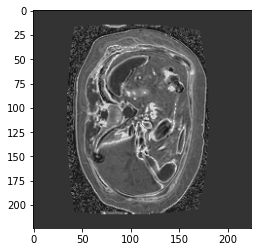

In [158]:
plt.imshow(ff[:,:,8], cmap='gray')
plt.show

In [159]:
ff = ff.astype('int8')

In [160]:
ff_nii = nib.Nifti1Image(ff, ff_ni.affine)

In [161]:
nib.save(ff_nii, case_id)

In [18]:
''' SINGLE CALCULATION AND TEST VISUALIZATIONS '''

' SINGLE CALCULATION AND TEST VISUALIZATIONS '

In [9]:
orig_pre   = r'N:\2_Analysis\automated_analysis\cynch_segmentations\cynch_additions\analysis masks\original_segseg/'
hcbvr_pre  = r'N:\2_Analysis\automated_analysis\cynch_segmentations\cynch_additions\analysis masks\human_corrected_without_vessel_removal/'
hcavr_pre  = r'N:\2_Analysis\automated_analysis\cynch_segmentations\cynch_additions\analysis masks\human_corrected_with_vessel_removal/'
ff_pre     = r'N:\2_Analysis\automated_analysis\cynch_segmentations\cynch_additions\analysis masks\fatfrac/'
vessel_pre = r'N:\2_Analysis\automated_analysis\cynch_segmentations\cynch_additions\analysis masks\vessel_segmentation/'

In [10]:
case_id = 'c_9122.nii'
case_id

'c_9122.nii'

In [11]:
orig   = nib.load(orig_pre + case_id).get_fdata()
hcbvr  = nib.load(hcbvr_pre + case_id).get_fdata()
hcavr  = nib.load(hcavr_pre + case_id).get_fdata()
ff     = nib.load(ff_pre + case_id).get_fdata()
vessel = nib.load(vessel_pre + case_id).get_fdata()

print(orig.shape)
print(hcbvr.shape)
print(hcavr.shape)
print(ff.shape)
print(vessel.shape)

(224, 224, 27)
(224, 224, 27)
(224, 224, 27)
(224, 224, 27)
(224, 224, 27)


In [12]:
orig = np.swapaxes(orig, 0, 1)
orig = np.flip(orig, 0)
orig = np.flip(orig, 1)
hcbvr = np.swapaxes(hcbvr, 0, 1)
hcbvr = np.flip(hcbvr, 0)
hcbvr = np.flip(hcbvr, 1)
hcavr = np.swapaxes(hcavr, 0, 1)
hcavr = np.flip(hcavr, 0)
hcavr = np.flip(hcavr, 1)
ff = np.swapaxes(ff, 0, 1)
ff = np.flip(ff, 0)
ff = np.flip(ff, 1)
vessel = np.swapaxes(vessel, 0, 1)
vessel = np.flip(vessel, 0)
vessel = np.flip(vessel, 1)

In [13]:
whole = np.zeros((orig.shape[0],orig.shape[1],orig.shape[2]))
whole[orig != 0] = 1

<function matplotlib.pyplot.show(close=None, block=None)>

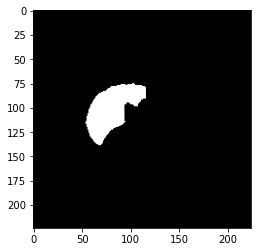

In [14]:
plt.imshow(whole[:,:,12],cmap='gray')
plt.show

In [15]:
image = nib.load(orig_pre + case_id)
voxel_dimensions = (image.affine[0,0],image.affine[1,1],image.affine[2,2])
eroded_whole = erode_liver_3D(whole, voxel_dimensions)

In [16]:
voxel_dimensions

(1.875, 1.875, 10.0)

<function matplotlib.pyplot.show(close=None, block=None)>

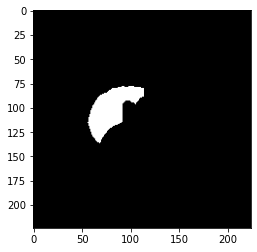

In [17]:
plt.imshow(eroded_whole[:,:,12],cmap='gray')
plt.show

In [18]:
eroded_segments = np.multiply(eroded_whole, orig)

<function matplotlib.pyplot.show(close=None, block=None)>

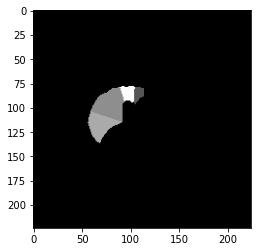

In [19]:
plt.imshow(eroded_segments[:,:,12],cmap='gray')
plt.show

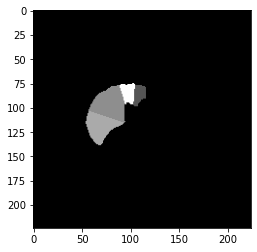

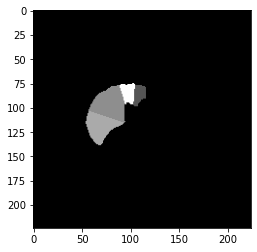

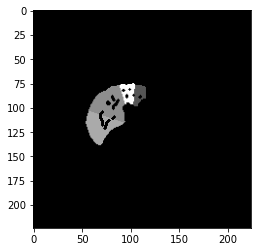

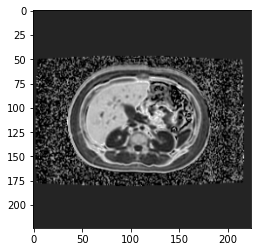

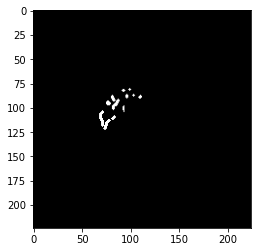

In [20]:
plt.imshow(orig[:,:,12],cmap='gray')
plt.show()
plt.imshow(hcbvr[:,:,12],cmap='gray')
plt.show()
plt.imshow(hcavr[:,:,12],cmap='gray')
plt.show()
plt.imshow(ff[:,:,12],cmap='gray')
plt.show()
plt.imshow(vessel[:,:,12],cmap='gray')
plt.show()

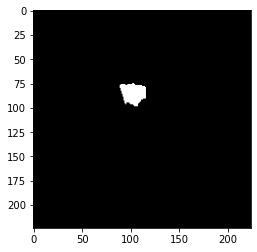

In [21]:
om_ll = np.zeros((orig.shape[0],orig.shape[1],orig.shape[2]))

om_ll[orig != 0] = 1
om_ll[orig == 5] = 0
om_ll[orig == 6] = 0
om_ll[orig == 7] = 0
om_ll[orig == 8] = 0
om_ll[orig == 1] = 0

plt.imshow(om_ll[:,:,12],cmap='gray')
plt.show()

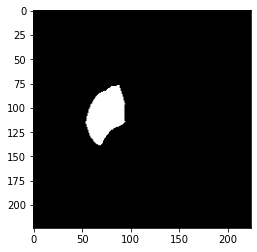

In [22]:
om_rl = np.zeros((orig.shape[0],orig.shape[1],orig.shape[2]))

om_rl[orig != 0] = 1
om_rl[orig == 2] = 0
om_rl[orig == 3] = 0
om_rl[orig == 4] = 0
om_rl[orig == 9] = 0
om_rl[orig == 1] = 0

plt.imshow(om_rl[:,:,12],cmap='gray')
plt.show()

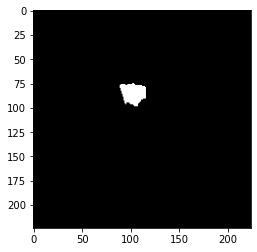

In [23]:
hcbvr_ll = np.zeros((hcbvr.shape[0],hcbvr.shape[1],hcbvr.shape[2]))

hcbvr_ll[hcbvr != 0] = 1
hcbvr_ll[hcbvr == 5] = 0
hcbvr_ll[hcbvr == 6] = 0
hcbvr_ll[hcbvr == 7] = 0
hcbvr_ll[hcbvr == 8] = 0
hcbvr_ll[hcbvr == 1] = 0

plt.imshow(hcbvr_ll[:,:,12],cmap='gray')
plt.show()

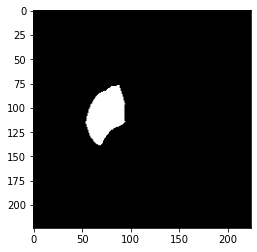

In [24]:
hcbvr_rl = np.zeros((hcbvr.shape[0],hcbvr.shape[1],hcbvr.shape[2]))

hcbvr_rl[hcbvr != 0] = 1
hcbvr_rl[hcbvr == 2] = 0
hcbvr_rl[hcbvr == 3] = 0
hcbvr_rl[hcbvr == 4] = 0
hcbvr_rl[hcbvr == 9] = 0
hcbvr_rl[hcbvr == 1] = 0

plt.imshow(om_rl[:,:,12],cmap='gray')
plt.show()

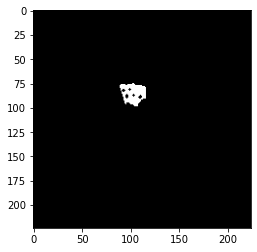

In [25]:
hcavr_ll = np.zeros((hcavr.shape[0],hcavr.shape[1],hcavr.shape[2]))

hcavr_ll[hcavr != 0] = 1
hcavr_ll[hcavr == 5] = 0
hcavr_ll[hcavr == 6] = 0
hcavr_ll[hcavr == 7] = 0
hcavr_ll[hcavr == 8] = 0
hcavr_ll[hcavr == 1] = 0

plt.imshow(hcavr_ll[:,:,12],cmap='gray')
plt.show()

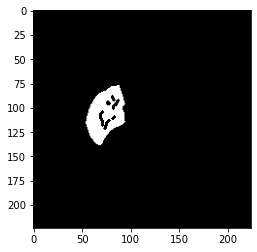

In [26]:
hcavr_rl = np.zeros((hcavr.shape[0],hcavr.shape[1],hcavr.shape[2]))

hcavr_rl[hcavr != 0] = 1
hcavr_rl[hcavr == 2] = 0
hcavr_rl[hcavr == 3] = 0
hcavr_rl[hcavr == 4] = 0
hcavr_rl[hcavr == 9] = 0
hcavr_rl[hcavr == 1] = 0

plt.imshow(hcavr_rl[:,:,12],cmap='gray')
plt.show()

In [29]:
data['Patient ID'].append(case_id)
data['vessel_ff_mean'].append(get_mean(ff[vessel == 1]))
data['vessel_ff_median'].append(get_median(ff[vessel == 1]))
data['vessel_ff_std'].append(get_std(ff[vessel == 1]))

data['OM_WHOLE_ff_mean'].append(get_mean(ff[orig != 0]))
data['OM_WHOLE_ff_median'].append(get_median(ff[orig != 0]))
data['OM_WHOLE_ff_std'].append(get_std(ff[orig != 0]))
data['OM_LEFT_LOBE_ff_mean'].append(get_mean(ff[om_ll == 1]))
data['OM_LEFT_LOBE_ff_median'].append(get_median(ff[om_ll == 1]))
data['OM_LEFT_LOBE_ff_std'].append(get_std(ff[om_ll == 1]))
data['OM_RIGHT_LOBE_ff_mean'].append(get_mean(ff[om_rl == 1]))
data['OM_RIGHT_LOBE_ff_median'].append(get_median(ff[om_rl == 1]))
data['OM_RIGHT_LOBE_ff_std'].append(get_std(ff[om_rl == 1]))
data['OM_CAUDATE_ff_mean'].append(get_mean(ff[orig == 1]))
data['OM_CAUDATE_ff_median'].append(get_median(ff[orig == 1]))
data['OM_CAUDATE_ff_std'].append(get_std(ff[orig == 1]))

for i in range(2):
    data['OM_segment_' + str(i+2) + '_ff_mean'].append(get_mean(ff[orig == i+2]))
    data['OM_segment_' + str(i+2) + '_ff_median'].append(get_median(ff[orig == i+2]))
    data['OM_segment_' + str(i+2) + '_ff_std'].append(get_std(ff[orig == i+2]))

data['OM_segment_4a_ff_mean'].append(get_mean(ff[orig == 4]))
data['OM_segment_4a_ff_median'].append(get_median(ff[orig == 4]))
data['OM_segment_4a_ff_std'].append(get_std(ff[orig == 4]))
data['OM_segment_4b_ff_mean'].append(get_mean(ff[orig == 9]))
data['OM_segment_4b_ff_median'].append(get_median(ff[orig == 9]))
data['OM_segment_4b_ff_std'].append(get_std(ff[orig == 9]))
    
for i in range(4):
    data['OM_segment_' + str(i+5) + '_ff_mean'].append(get_mean(ff[orig == i+5]))
    data['OM_segment_' + str(i+5) + '_ff_median'].append(get_median(ff[orig == i+5]))
    data['OM_segment_' + str(i+5) + '_ff_std'].append(get_std(ff[orig == i+5]))
    
    
    
data['HCBVR_WHOLE_ff_mean'].append(get_mean(ff[hcbvr != 0]))
data['HCBVR_WHOLE_ff_median'].append(get_median(ff[hcbvr != 0]))
data['HCBVR_WHOLE_ff_std'].append(get_std(ff[hcbvr != 0]))
data['HCBVR_LEFT_LOBE_ff_mean'].append(get_mean(ff[hcbvr_ll == 1]))
data['HCBVR_LEFT_LOBE_ff_median'].append(get_median(ff[hcbvr_ll == 1]))
data['HCBVR_LEFT_LOBE_ff_std'].append(get_std(ff[hcbvr_ll == 1]))
data['HCBVR_RIGHT_LOBE_ff_mean'].append(get_mean(ff[hcbvr_rl == 1]))
data['HCBVR_RIGHT_LOBE_ff_median'].append(get_median(ff[hcbvr_rl == 1]))
data['HCBVR_RIGHT_LOBE_ff_std'].append(get_std(ff[hcbvr_rl == 1]))
data['HCBVR_CAUDATE_ff_mean'].append(get_mean(ff[hcbvr == 1]))
data['HCBVR_CAUDATE_ff_median'].append(get_median(ff[hcbvr == 1]))
data['HCBVR_CAUDATE_ff_std'].append(get_std(ff[hcbvr == 1]))

for i in range(2):
    data['HCBVR_segment_' + str(i+2) + '_ff_mean'].append(get_mean(ff[hcbvr == i+2]))
    data['HCBVR_segment_' + str(i+2) + '_ff_median'].append(get_median(ff[hcbvr == i+2]))
    data['HCBVR_segment_' + str(i+2) + '_ff_std'].append(get_std(ff[hcbvr == i+2]))

data['HCBVR_segment_4a_ff_mean'].append(get_mean(ff[hcbvr == 4]))
data['HCBVR_segment_4a_ff_median'].append(get_median(ff[hcbvr == 4]))
data['HCBVR_segment_4a_ff_std'].append(get_std(ff[hcbvr == 4]))
data['HCBVR_segment_4b_ff_mean'].append(get_mean(ff[hcbvr == 9]))
data['HCBVR_segment_4b_ff_median'].append(get_median(ff[hcbvr == 9]))
data['HCBVR_segment_4b_ff_std'].append(get_std(ff[hcbvr == 9]))
    
for i in range(4):
    data['HCBVR_segment_' + str(i+5) + '_ff_mean'].append(get_mean(ff[hcbvr == i+5]))
    data['HCBVR_segment_' + str(i+5) + '_ff_median'].append(get_median(ff[hcbvr == i+5]))
    data['HCBVR_segment_' + str(i+5) + '_ff_std'].append(get_std(ff[hcbvr == i+5]))
    
    
    
data['HCAVR_WHOLE_ff_mean'].append(get_mean(ff[hcavr != 0]))
data['HCAVR_WHOLE_ff_median'].append(get_median(ff[hcavr != 0]))
data['HCAVR_WHOLE_ff_std'].append(get_std(ff[hcavr != 0]))
data['HCAVR_LEFT_LOBE_ff_mean'].append(get_mean(ff[hcavr_ll == 1]))
data['HCAVR_LEFT_LOBE_ff_median'].append(get_median(ff[hcavr_ll == 1]))
data['HCAVR_LEFT_LOBE_ff_std'].append(get_std(ff[hcavr_ll == 1]))
data['HCAVR_RIGHT_LOBE_ff_mean'].append(get_mean(ff[hcavr_rl == 1]))
data['HCAVR_RIGHT_LOBE_ff_median'].append(get_median(ff[hcavr_rl == 1]))
data['HCAVR_RIGHT_LOBE_ff_std'].append(get_std(ff[hcavr_rl == 1]))
data['HCAVR_CAUDATE_ff_mean'].append(get_mean(ff[hcavr == 1]))
data['HCAVR_CAUDATE_ff_median'].append(get_median(ff[hcavr == 1]))
data['HCAVR_CAUDATE_ff_std'].append(get_std(ff[hcavr == 1]))

for i in range(2):
    data['HCAVR_segment_' + str(i+2) + '_ff_mean'].append(get_mean(ff[hcavr == i+2]))
    data['HCAVR_segment_' + str(i+2) + '_ff_median'].append(get_median(ff[hcavr == i+2]))
    data['HCAVR_segment_' + str(i+2) + '_ff_std'].append(get_std(ff[hcavr == i+2]))

data['HCAVR_segment_4a_ff_mean'].append(get_mean(ff[hcavr == 4]))
data['HCAVR_segment_4a_ff_median'].append(get_median(ff[hcavr == 4]))
data['HCAVR_segment_4a_ff_std'].append(get_std(ff[hcavr == 4]))
data['HCAVR_segment_4b_ff_mean'].append(get_mean(ff[hcavr == 9]))
data['HCAVR_segment_4b_ff_median'].append(get_median(ff[hcavr == 9]))
data['HCAVR_segment_4b_ff_std'].append(get_std(ff[hcavr == 9]))
    
for i in range(4):
    data['HCAVR_segment_' + str(i+5) + '_ff_mean'].append(get_mean(ff[hcavr == i+5]))
    data['HCAVR_segment_' + str(i+5) + '_ff_median'].append(get_median(ff[hcavr == i+5]))
    data['HCAVR_segment_' + str(i+5) + '_ff_std'].append(get_std(ff[hcavr == i+5]))

In [30]:
data['Patient ID']

['c_9122.nii']

In [31]:
df = pd.DataFrame(data)
df.shape

(1, 112)

In [32]:
df.to_excel('PDFF_analysis_results.xlsx', index=False)